Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

Import the data.

In [2]:
trip_2023_01 = pd.read_csv('2023_DataSets/2023_01.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_02 = pd.read_csv('2023_DataSets/2023_02.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_03 = pd.read_csv('2023_DataSets/2023_03.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_04 = pd.read_csv('2023_DataSets/2023_04.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_05 = pd.read_csv('2023_DataSets/2023_05.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_06 = pd.read_csv('2023_DataSets/2023_06.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_07 = pd.read_csv('2023_DataSets/2023_07.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_08 = pd.read_csv('2023_DataSets/2023_08.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_09 = pd.read_csv('2023_DataSets/2023_09.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_10 = pd.read_csv('2023_DataSets/2023_10.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_11 = pd.read_csv('2023_DataSets/2023_11.csv', parse_dates=['started_at', 'ended_at'])

In the below cell, I combined all the data sets of the year 2023 since they were collected separately.

In [3]:
concat_dataset_2023 = [trip_2023_01, trip_2023_02, trip_2023_03, trip_2023_04,\
                       trip_2023_05, trip_2023_06, trip_2023_07, trip_2023_08,\
                        trip_2023_09, trip_2023_10, trip_2023_11]

year_2023 = pd.concat(concat_dataset_2023, ignore_index=True)


Brief overview of the dataset.

In [4]:
year_2023.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual


No of data entries

In [5]:
print(f'The total no of entries is {len(year_2023)}.')

The total no of entries is 5495804.


Data Validation

In [6]:
year_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495804 entries, 0 to 5495803
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 545.1+ MB


Checking basic statistics of the data

In [7]:
year_2023.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
count,5495804,5495804,5.495804e+06,5.495804e+06,5.489053e+06,5.489053e+06
mean,2023-07-10 06:47:12.699673600,2023-07-10 07:05:34.516624384,4.190293e+01,-8.764698e+01,4.190327e+01,-8.764715e+01
min,2023-01-01 00:01:58,2023-01-01 00:02:41,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01
25%,2023-05-18 18:15:14.500000,2023-05-18 18:32:05.750000128,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766027e+01
50%,2023-07-16 13:09:35.500000,2023-07-16 13:30:46,4.189921e+01,-8.764400e+01,4.190000e+01,-8.764410e+01
75%,2023-09-09 12:49:02.750000128,2023-09-09 13:10:32,4.193000e+01,-8.762991e+01,4.193000e+01,-8.762991e+01
max,2023-11-30 23:59:14,2023-12-01 20:42:31,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00
std,NaN,NaN,4.508941e-02,2.735129e-02,5.481862e-02,7.038253e-02


No of riders(members)

In [8]:
no_member_riders = year_2023['member_casual'] == 'member'
print(f'No of riders that were members are {no_member_riders.sum()}.')

No of riders that were members are 3488297.


No of riders(casual)

In [9]:
no_casual_riders = year_2023['member_casual'] == 'casual'
print(f'No of riders that were casuals are {no_casual_riders.sum()}.')

No of riders that were casuals are 2007507.


Dropped four columns that were not relevant to the analysis.

In [10]:
year_2023.drop(axis=1, columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)

Checked for duplicate values.

In [11]:
duplicate = year_2023.duplicated()
duplicate.sum()

0

Data Cleaning: Checked if there were empty columns.

Thereafter, removed empty rows.

Checked again if there were missing values.  


In [12]:
year_2023.isna().sum()

year_2023.dropna(inplace=True)

year_2023.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
dtype: int64

Created a column called ride_length  in the Rides table. This calculates the total ride time.

Created a column called day of the week to check the days when people rode.

In [13]:
year_2023['ride_length'] = year_2023['ended_at'] - year_2023['started_at']

hours = year_2023['ride_length'].dt.components['hours']
minutes = year_2023['ride_length'].dt.components['minutes']
seconds = year_2023['ride_length'].dt.components['seconds']

year_2023['ride_length'] = hours.map("{:02}".format) + ":" + minutes.map("{:02}".format) + ":" + seconds.map("{:02}".format)

year_2023['month'] = year_2023['started_at'].dt.month_name()

year_2023['day_of_week'] = year_2023['started_at'].dt.strftime('%A')

# Convert 'ride_length' to timedelta
year_2023['ride_length_split'] = pd.to_timedelta(year_2023['ride_length'])

Pivot table was used to aggregate a data based on the member type and the len of the column.

Visualized the data to seee the member type with the highest max ride length.

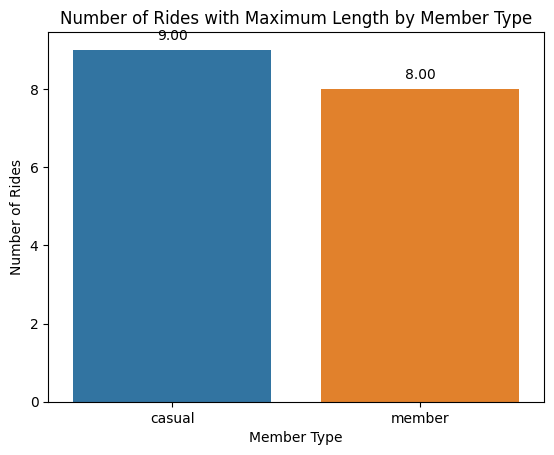

In [14]:
year_2023.head(5)

max_ride_length_row = year_2023[year_2023['ride_length_split'] == year_2023['ride_length_split'].max()]
max_ride_length_row = max_ride_length_row.pivot_table(columns='member_casual', values='ride_id', aggfunc=len)

ax = sns.barplot(data=max_ride_length_row)

# Set the title and axis labels
plt.title('Number of Rides with Maximum Length by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Number of Rides')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
                                          xytext=(0, 10), textcoords='offset points')

Created various variables to check:

1. The average ride length by type of riders.

2. The average ride length by day of week.

3. The number of users by day of week.

In [15]:
avg_ride_length_by_type_of_riders = year_2023.\
    pivot_table(values='ride_length_split', index='member_casual', aggfunc=(np.mean))

avg_ride_length_by_day_of_week = year_2023.\
    pivot_table(columns='day_of_week', index='member_casual', values='ride_length_split', aggfunc=np.mean)

number_users_by_day_of_week = year_2023.\
    pivot_table(index='day_of_week', columns='member_casual', aggfunc='count', fill_value=0, values='ride_id')

C:\Users\user\AppData\Local\Temp\ipykernel_1808\3781120427.py:2: FutureWarning: The provided callable <function mean at 0x0000024641770180> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table(values='ride_length_split', index='member_casual', aggfunc=(np.mean))
C:\Users\user\AppData\Local\Temp\ipykernel_1808\3781120427.py:5: FutureWarning: The provided callable <function mean at 0x0000024641770180> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table(columns='day_of_week', index='member_casual', values='ride_length_split', aggfunc=np.mean)


Created a barplot to visualize the member types by the "average ride length in seconds".

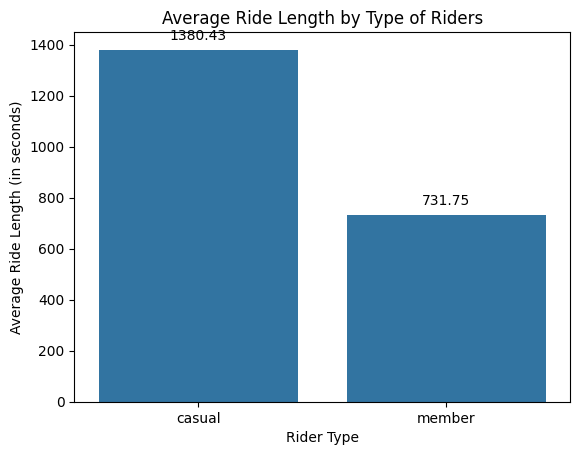

In [16]:
ax = sns.barplot(x='member_casual', y=avg_ride_length_by_type_of_riders['ride_length_split'].\
                 dt.total_seconds(), data=avg_ride_length_by_type_of_riders)
plt.title('Average Ride Length by Type of Riders')
plt.xlabel('Rider Type')
plt.ylabel('Average Ride Length (in seconds)')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
                                          xytext=(0, 10), textcoords='offset points')

Created a column called "hour_started" in the dataframe "year_2023".

This extracts the hour that the cyclists started riding. 

In [17]:
year_2023.head(5)
year_2023['started_at'] = pd.to_datetime(year_2023['started_at'])

year_2023['hour_started'] = year_2023['started_at'].dt.floor('H')

year_2023['hour_started'] = year_2023['hour_started'].dt.hour

Created a line and bar plot that shows the rise and fall of the hours they started riding and also, the various member types.

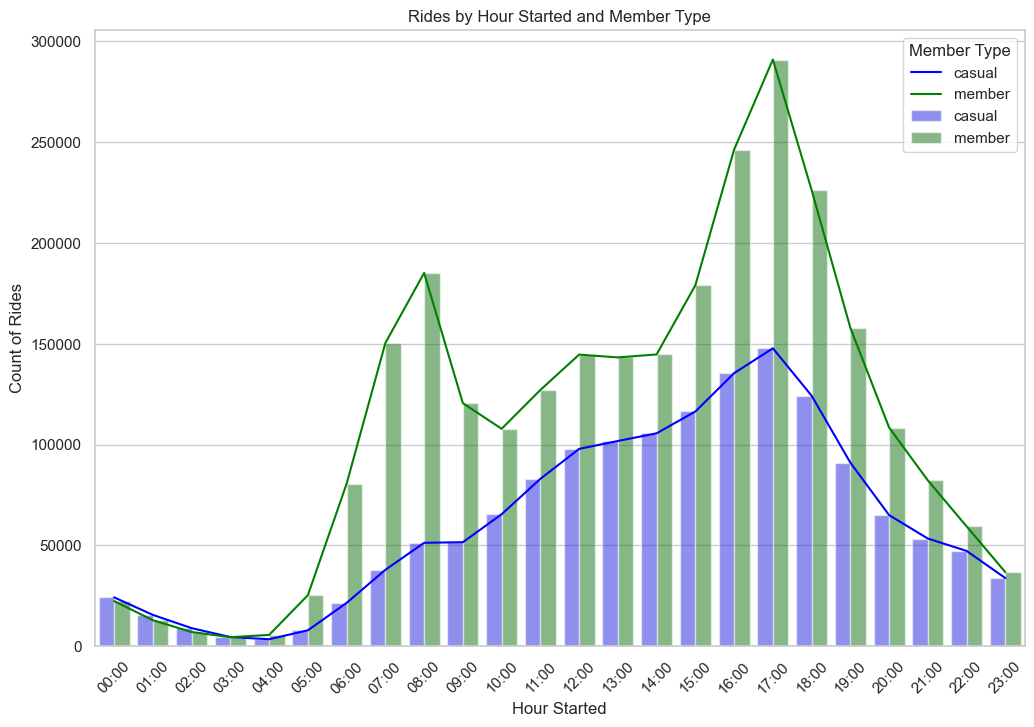

In [18]:
hour_by_member_count = year_2023.groupby(['hour_started', 'member_casual']).size().reset_index(name='count')

# Plotting
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
color = {'member':'Green', 'casual':'Blue'}
# Line plot
sns.lineplot(data=hour_by_member_count, x='hour_started', y='count', palette=color, hue='member_casual', ax=ax, errorbar=None)

# Bar plot
sns.barplot(data=hour_by_member_count, x='hour_started', y='count', palette=color, hue='member_casual', ax=ax, alpha=0.5, errorbar=None)

# Set the x-axis ticks to represent each hour
ax.set_xticks(range(24))
ax.set_xticklabels([f'{hour:02d}:00' for hour in range(24)], rotation=45)

# Set the title and labels for the plot
ax.set_title("Rides by Hour Started and Member Type")
ax.set_xlabel("Hour Started")
ax.set_ylabel("Count of Rides")

# Display the legend
ax.legend(title="Member Type", loc='upper right')

Created a heatmap to visualize the member types by the "average ride length in seconds" and day of the week.

The thicker colours indicate the  higher number of rides for that type of member on that specific day of the week. The lighter colours indicate fewer number of rides for that type of member on that specific day of the week.

Text(117.24999999999999, 0.5, 'Member Type')

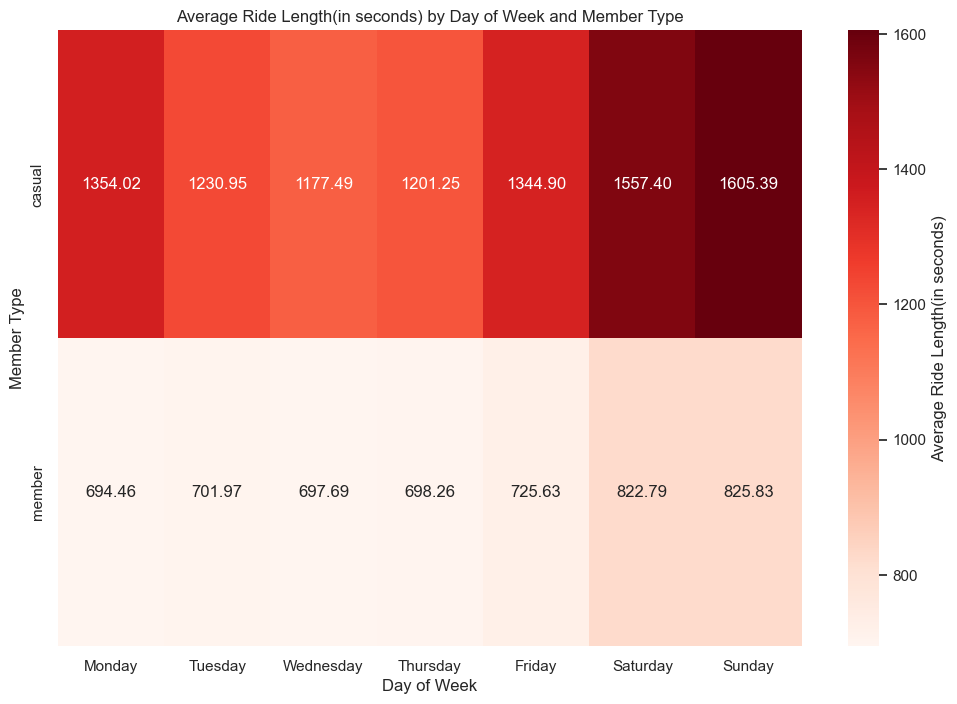

In [19]:
avg_ride_length_by_day_of_week_seconds = avg_ride_length_by_day_of_week.apply(lambda x: x.dt.total_seconds())

avg_ride_length_by_day_of_week_seconds = pd.melt(avg_ride_length_by_day_of_week_seconds.reset_index(),\
                                                id_vars=["member_casual"], var_name="day_of_week",\
                                                value_name="avg_ride_length")
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the column 'day_of_week' to a categorical variable.
avg_ride_length_by_day_of_week_seconds['day_of_week'] = pd.Categorical(avg_ride_length_by_day_of_week_seconds['day_of_week'],\
                                                                       categories=days_order, ordered=True)

# Sort the DataFrame by the ordered days of the week
avg_ride_length_by_day_of_week_seconds = avg_ride_length_by_day_of_week_seconds.sort_values(by='day_of_week')

# Create a pivot table with numerical values
avg_ride_length_by_day_of_week_seconds = avg_ride_length_by_day_of_week_seconds.\
    pivot_table(index='member_casual', columns='day_of_week', values='avg_ride_length')


sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(avg_ride_length_by_day_of_week_seconds, cmap="Reds",\
            annot=True, fmt=".2f", cbar_kws={'label': 'Average Ride Length(in seconds)'})
plt.title('Average Ride Length(in seconds) by Day of Week and Member Type')
plt.xlabel('Day of Week')
plt.ylabel('Member Type')

Visualized a pivot table showing the number of users by day of week and member types.

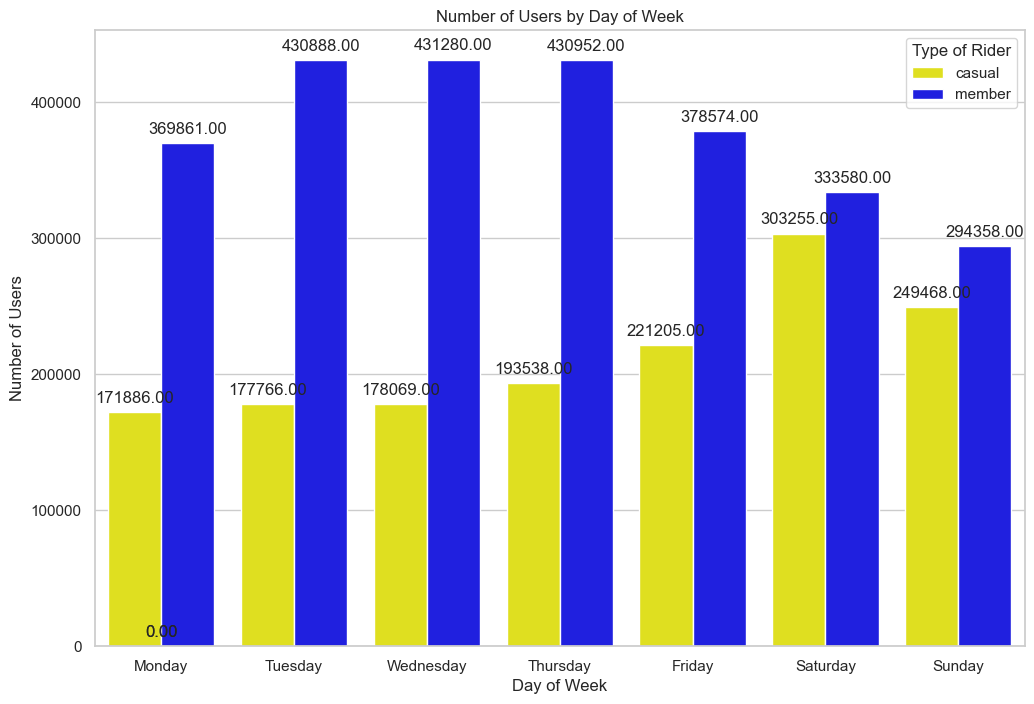

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

number_users_by_day_of_week_melt = pd.melt(number_users_by_day_of_week.reset_index(), id_vars=['day_of_week'],\
                                           value_vars=['casual', 'member'], var_name='member_casual', value_name='ride_count')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
ax = sns.barplot(data=number_users_by_day_of_week_melt, x='day_of_week',\
                 y='ride_count', hue='member_casual',order=days_order,\
                  palette={'member':'blue', 'casual':'yellow'})
# Customize the plot
plt.title('Number of Users by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Users')
plt.legend(title='Type of Rider')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
                                          xytext=(0, 10), textcoords='offset points')

Created a pivot table to group the month data by the type of members.

In [21]:
no_of_users_by_month = year_2023.pivot_table(index='month', columns='member_casual', aggfunc='count',\
                                             fill_value=0, values='ride_id')

Visualized the above written code.

<Figure size 1200x800 with 0 Axes>

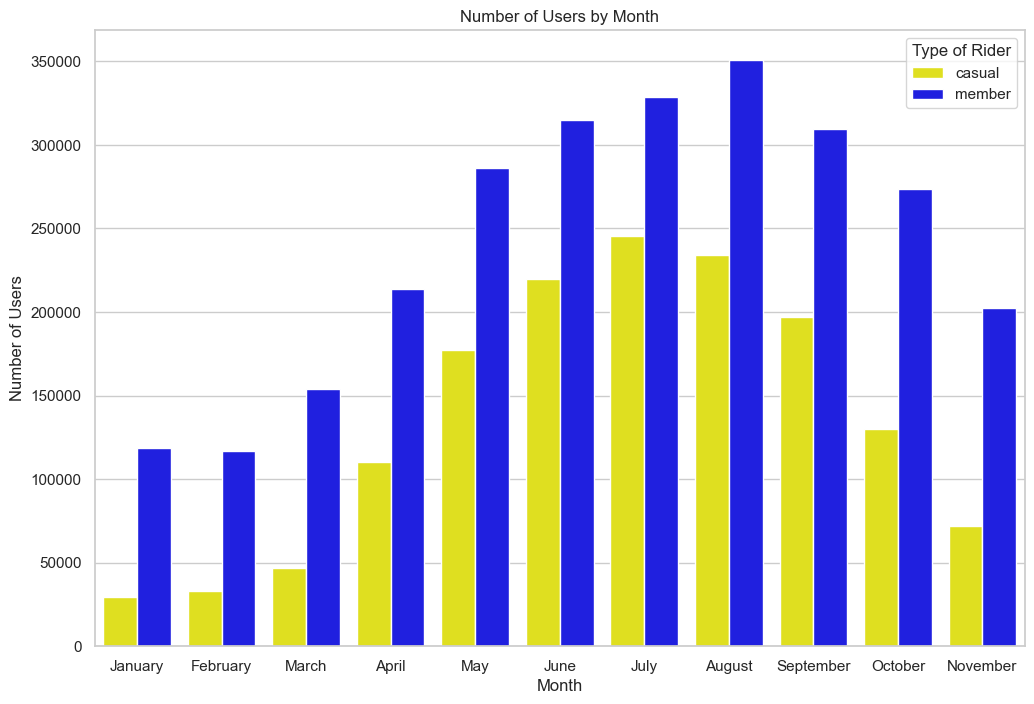

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

no_of_users_by_month_melt = pd.melt(no_of_users_by_month.reset_index(), id_vars=['month'],\
                                           value_vars=['casual', 'member'], var_name='member_casual', value_name='ride_count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

# Create a bar plot
ax = sns.barplot(data=no_of_users_by_month_melt, x='month',\
                 y='ride_count', hue='member_casual',order=month_order,\
                  palette={'member':'blue', 'casual':'yellow'})
# Customize the plot
plt.title('Number of Users by Month')
plt.xticks()
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.legend(title='Type of Rider')